### 1. Load MNIST Database
 - It has 70,000 images of hand-written digits
 - Images dimensions are 28 $\times$ 28
 - Grayscale images

In [1]:
from keras.datasets import mnist

# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


### 2. Visualize the First Six Training Images

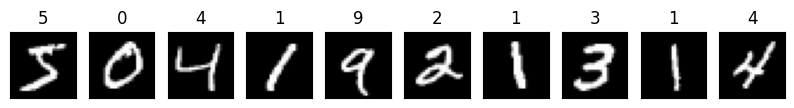

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(10,2))
for i in range(10):
    ax = fig.add_subplot(1, 10, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

### 3. View an Image in More Detail

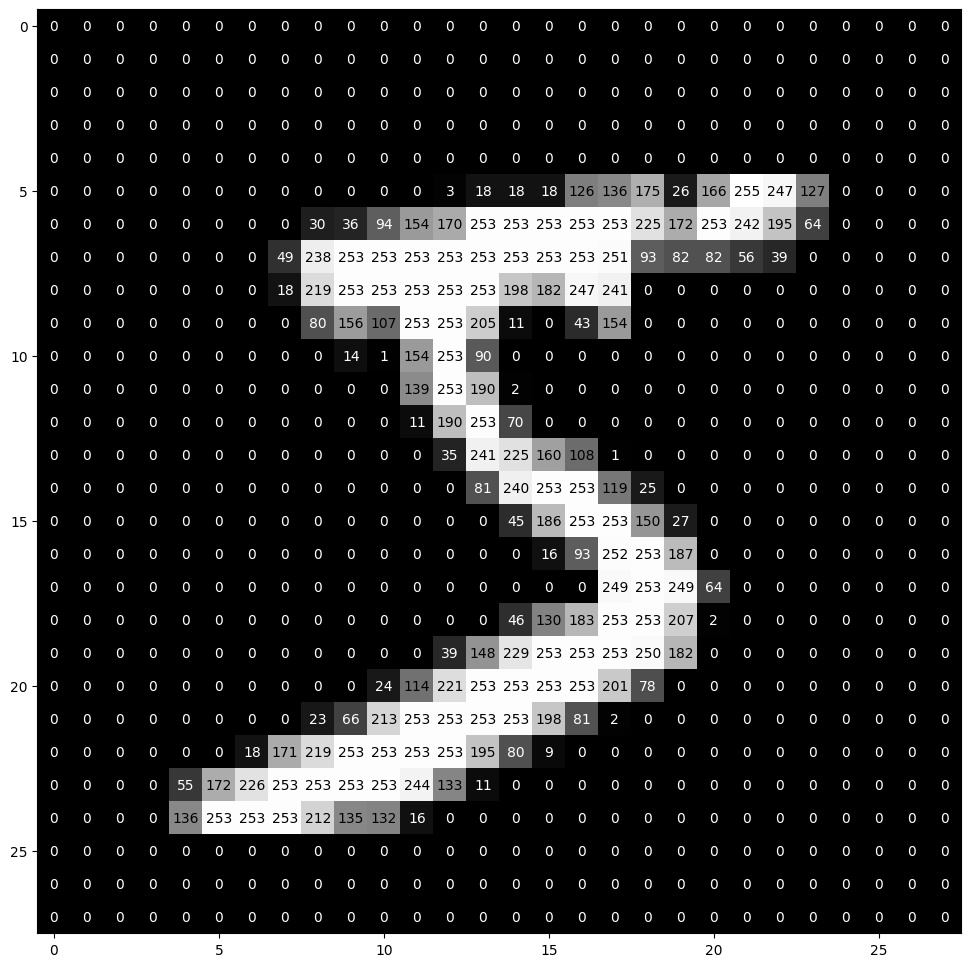

In [3]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

### 4. Preprocess Input Images 
- Rescale the Images by Dividing Every Pixel in Every Image by 255

In [4]:
# normalize the data to accelerate learning
mean = np.mean(X_train)
std = np.std(X_train)
X_train = 1- (X_train-mean)/(std+1e-7)
X_test = 1- (X_test-mean)/(std+1e-7)

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


### 정규화(Normalization)와 표준화(Standardization)의 차이

둘 다 데이터의 스케일(척도)을 조정하여 모델의 학습을 돕는다는 공통점이 있지만, 목적과 방식에 명확한 차이가 있습니다.

#### **1. 정규화 (Normalization)**

-   **목표**: 데이터의 모든 값을 **0과 1 사이의 범위**로 압축하는 것입니다. (또는 -1과 1 사이)
-   **계산 방식 (Min-Max Scaling)**:
    `새로운 값 = (원래 값 - 데이터의 최솟값) / (데이터의 최댓값 - 데이터의 최솟값)`
-   **언제 사용하는가?**
    -   데이터의 분포를 알 수 없거나, 정규분포가 아닐 때.
    -   **이미지 데이터**처럼 값의 범위가 명확할 때 (예: 0~255).
    -   Support Vector Machine (SVM), K-Nearest Neighbors (KNN) 등 값의 범위에 민감한 알고리즘을 사용할 때.
-   **특징**:
    -   데이터의 원래 분포 모양을 유지하면서 스케일만 조절합니다.
    -   이상치(Outlier)에 매우 민감합니다. (아주 큰 값이나 작은 값이 있으면 대부분의 데이터가 매우 좁은 범위에 몰리게 됩니다.)

#### **2. 표준화 (Standardization)**

-   **목표**: 데이터의 분포를 **평균(mean) 0, 표준편차(standard deviation) 1**을 갖도록 변환하는 것입니다.
-   **계산 방식 (Z-score)**:
    `새로운 값 = (원래 값 - 데이터의 평균) / (데이터의 표준편차)`
-   **언제 사용하는가?**
    -   데이터가 정규분포를 따르거나, 그렇게 가정할 수 있을 때.
    -   선형 회귀(Linear Regression), 로지스틱 회귀(Logistic Regression) 등 데이터가 정규분포를 따를 때 성능이 더 좋아지는 알고리즘을 사용할 때.
-   **특징**:
    -   결과 값의 범위가 특정되지 않습니다. (음수 값, 1보다 큰 값이 나타날 수 있습니다.)
    -   정규화에 비해 이상치에 덜 민감합니다.

---

### **요약**

| 구분 | **정규화 (Normalization)** | **표준화 (Standardization)** |
| :--- | :--- | :--- |
| **목표** | 값을 [0, 1] 범위로 스케일링 | 평균 0, 표준편차 1로 변환 |
| **계산식** | (X - min) / (max - min) | (X - mean) / std |
| **결과 범위** | [0, 1] | 정해진 범위 없음 |
| **민감도** | 이상치에 민감 | 이상치에 상대적으로 덜 민감 |
| **주 사용처**| 이미지 처리, KNN, SVM | 선형 모델, PCA, 데이터가 정규분포를 따를 때 |

**이 노트북에서는 `(X - mean) / std` 방식을 사용했으므로 '표준화'를 적용한 것입니다.**

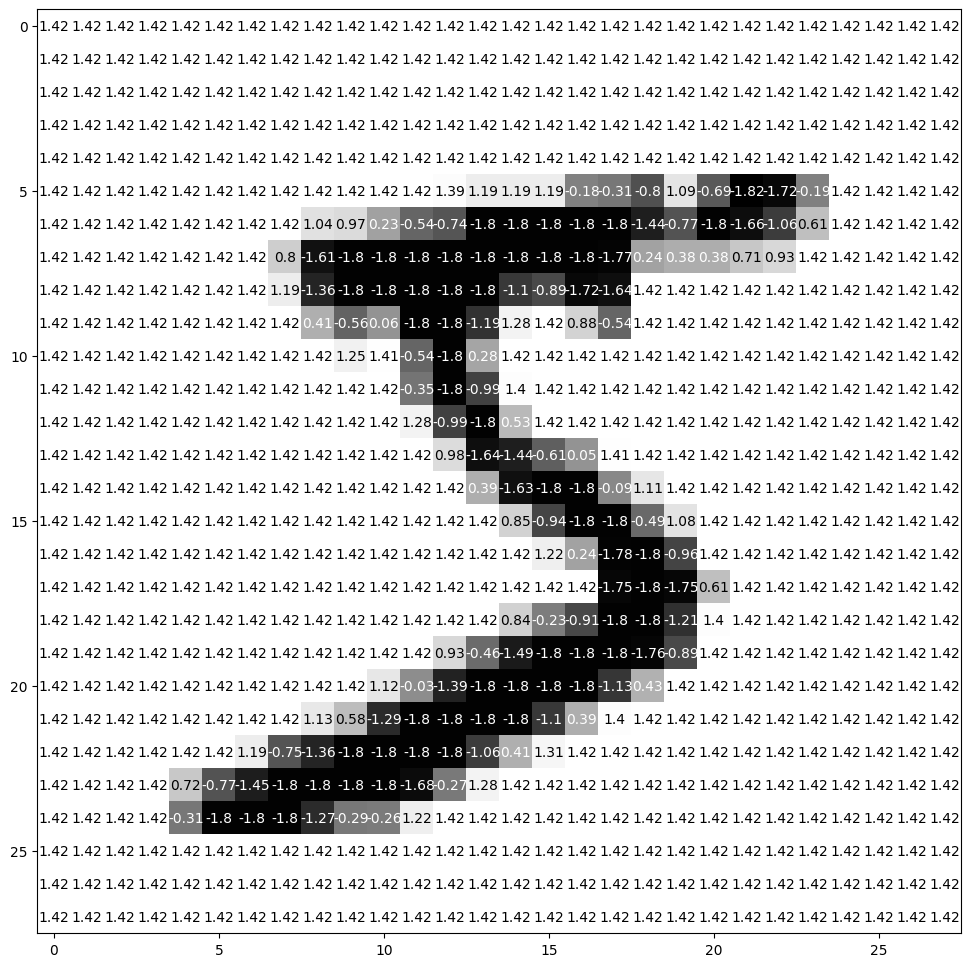

In [5]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

### 5. Preprocess the Labels
- Encode Categorical Integer Labels Using a One-Hot Scheme

In [ ]:
from keras.utils import to_categorical

num_classes = 10

print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode
y_train = to_categorical(y_train, num_classes=num_classes)
y_test  = to_categorical(y_test,  num_classes=num_classes)

print('One-hot labels:')
print(y_train[:10])
print('Shapes:', y_train.shape, y_test.shape)

### 6. Reshape data to fit our CNN (and input_shape)

In [ ]:
# input image dimensions 28x28 pixel images. 
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

print('image input shape: ', input_shape)
print('x_train shape:', X_train.shape)

### 7. Define the Model Architecture

In [ ]:
from keras.models import Sequential
from keras.layers import InputLayer, ZeroPadding2D, Conv2D, AveragePooling2D, MaxPooling2D, Flatten, Dense 

In [ ]:
model = Sequential()
model.add(InputLayer(shape=input_shape)) 
model.add(ZeroPadding2D(padding=(2, 2)))
model.add(Conv2D(filters=6, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Conv2D(filters=120, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='valid'))
model.add(Flatten())
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))
model.summary()

In [ ]:
# 첫번째 Convolution filter 초기 가중치
conv = model.layers[1]
k, b = conv.get_weights()
print(k.shape)
print(np.round(k[:, :, 0, 0], 4)) 
print(np.round(k[:, :, 0, 1], 4))
print(np.round(k[:, :, 0, 2], 4))
print(np.round(k[:, :, 0, 3], 4))
print(np.round(k[:, :, 0, 4], 4))
print(np.round(k[:, :, 0, 5], 4))
print(b.shape)
print(b)


In [ ]:
# Convolution filter와 bias 초기 가중치 설정 확인
print(type(model.layers[1].kernel_initializer).__name__)
print(type(model.layers[1].bias_initializer).__name__)

### 8. Compile the Model

In [ ]:
# compile the model by defining the loss function, optimizer, and performance metric
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### 9. Train the Model

### 10. Load the Model with the Best Classification Accuracy on the Validation Set

In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

# set the learning rate schedule as created in the original paper
def lr_schedule(epoch):
    if epoch <= 2:     
        lr = 5e-4 # 0.0005
    elif epoch > 2 and epoch <= 5:
        lr = 2e-4 # 0.0002
    elif epoch > 5 and epoch <= 9:
        lr = 1e-4 # 0.0001
    else: 
        lr = 1e-5 # 0.00005
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

# set the checkpointer
checkpointer = ModelCheckpoint(filepath='model.weights.keras', monitor='val_accuracy', mode='max',
                               save_best_only=True)

# train the model
hist = model.fit(X_train, y_train, batch_size=32, epochs=10,
          validation_data=(X_test, y_test), callbacks=[checkpointer, lr_scheduler], 
          verbose=1, shuffle=True)

In [ ]:
# 학습 후, 첫번째 Convolution filter 가중치
conv = model.layers[1]
k, b = conv.get_weights()
print(k.shape)
print(np.round(k[:, :, 0, 0], 4)) 
print(np.round(k[:, :, 0, 1], 4))
print(np.round(k[:, :, 0, 2], 4))
print(np.round(k[:, :, 0, 3], 4))
print(np.round(k[:, :, 0, 4], 4))
print(np.round(k[:, :, 0, 5], 4))
print(b.shape)
print(b)


In [ ]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.keras')

### 11. Calculate the Classification Accuracy on the Test Set

In [ ]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = score[1] * 100
print('score:', score)
# print test accuracy
print('Test accuracy: %.2f%%' % accuracy)

## 12. evaluate the model

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.plot( hist.history['accuracy'], 'o-')
ax.plot( hist.history['val_accuracy'], 'x-')

# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.plot([None] + hist.history['accuracy'], 'o-')
ax.plot([None] + hist.history['val_accuracy'], 'x-')

# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_loss'], 'x-')

# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train loss', "Val loss"], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.show()

## 13. cross entropy

In [ ]:
import numpy as np
import tensorflow as tf

def softmax(z):
    e = np.exp(z)
    return e / e.sum(axis=1, keepdims=True)

# 예시 데이터: 샘플 2개, 클래스 10개(=MNIST)
z = np.array([
    [ 2.1, -0.5,  0.7,  1.8, -1.2,  0.3, -0.7, -0.2, 0.1, -0.9],
    [ 0.2,  0.0, -0.1, -2.0,  0.5,  1.1, -0.3,  2.4, -1.2, 0.4]
], dtype=np.float32)

# 정답 클래스: 첫 샘플 3, 두 번째 7
y_idx = np.array([3, 7]) 

# 원-핫 라벨로 변환: shape = (2, 10)
K = 10
y = np.eye(K)[y_idx]
print('y:', y)

# 확률 
p = softmax(z)

def categorical_ce(y_onehot, p, eps=1e-12):
    return -np.sum(y_onehot * np.log(p), axis=1)   # = -log p_true

per_sample_ce = categorical_ce(y, p)  # 각 샘플 손실
batch_mean_ce = per_sample_ce.mean()  # 배치 평균 손실

per_sample_ce_sparse = -np.log(p[np.arange(len(y_idx)), y_idx])

ce_from_logits = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
ce_from_probs  = tf.keras.losses.CategoricalCrossentropy(from_logits=False)

print("예측 확률 p=\n", np.round(p, 4))
print("샘플별 CE =", np.round(per_sample_ce, 6))
print("배치 평균 CE =", float(batch_mean_ce))